## Background and Context

A tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer


Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost 
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Manually deleted the first worksheet in order to import only the necessary data
trip=pd.read_excel(CHOSE YOUR FOLDER)

In [4]:
# copying data to another varaible to avoid any changes to original data
data =trip.copy()

In [5]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
data.shape #Data shape has enough input to make reliable predictions

(4888, 20)

In [7]:
data.info() #Types of data available in the set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- There are 4888 observations on the data set
- Some columns have missing values
- Most of the columns are numerical (either int64 or float64)
- To decrease memory usage and support future analysis it is necessary to transform object into category

In [8]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [9]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [11]:
# Because the dataset is big enough, it is still ok to delete missing values.More on that later.
data = data.dropna()

In [12]:
data.nunique() # check the number of unique values in each column

CustomerID                  4128
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               33
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2182
dtype: int64

- Since Customer ID is unique, the number of ID´s is the same as the number of rows 
- Monthly income has the highest number of observations
- 'Age', 'Duration of Pitch' and 'Number of Trips' also have a certain amount of observations
- All other variables have few observations (unique values) and the distribution between different unique values are below

## Number of observations in each category

In [13]:
data.ProdTaken.value_counts() #Around 19% of people who took the product offer. Weight is high for non product takers.

0    3331
1     797
Name: ProdTaken, dtype: int64

In [14]:
data.TypeofContact.value_counts() #30% of the customer base was invited while 70% came on its own (Self Enquiry)

Self Enquiry       2918
Company Invited    1210
Name: TypeofContact, dtype: int64

In [15]:
data.Gender.value_counts() # 60% of the customers are male, the rest is female. The inputs with 'Fe Male' need to be changed to 'Female'

Male       2463
Female     1510
Fe Male     155
Name: Gender, dtype: int64

In [16]:
data.MaritalStatus.value_counts() #The highest majority of the customers are married

Married      1990
Divorced      789
Unmarried     682
Single        667
Name: MaritalStatus, dtype: int64

In [17]:
data.Occupation.value_counts() # Salaried and Small Business are the greatest percentage

Salaried          1999
Small Business    1746
Large Business     381
Free Lancer          2
Name: Occupation, dtype: int64

In [18]:
data.ProductPitched.value_counts() # Basic and Deluxe are the most pitched packages

Basic           1615
Deluxe          1422
Standard         737
Super Deluxe     250
King             104
Name: ProductPitched, dtype: int64

In [19]:
data.Designation.value_counts() #Customers professional profile are mostly Executive and Manager

Executive         1615
Manager           1422
Senior Manager     737
AVP                250
VP                 104
Name: Designation, dtype: int64

## Statistical Overview

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4128.0,202527.763808,1409.439133,200000.0,201320.75,202603.5,203748.25,204887.0
ProdTaken,4128.0,0.193072,0.394757,0.0,0.00,0.0,0.00,1.0
Age,4128.0,37.231831,9.174521,18.0,31.00,36.0,43.00,61.0
CityTier,4128.0,1.663275,0.920640,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.00,14.0,20.00,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.00,3.0,4.00,22.0
Passport,4128.0,0.295300,0.456233,0.0,0.00,0.0,1.00,1.0


- Above we can see that the variables with few unique values have no valuable statistical outputs (dispersion concentrated)
- Customer ID does not provide any significant outputs, since this is only a number of indentification
- Age has a wide range of distribution with min - max - mean dispersed (Histrogram with details)
- MonthlyIncome has the widest distribution range, with very dispersed values (Histogram with details)

In [21]:
data['Gender'].replace(to_replace ='Fe Male', value ='Female', inplace = True) # correcting entries for Gender

In [22]:
data.Gender.value_counts()

Male      2463
Female    1665
Name: Gender, dtype: int64

## Univariate Analysis

In [23]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

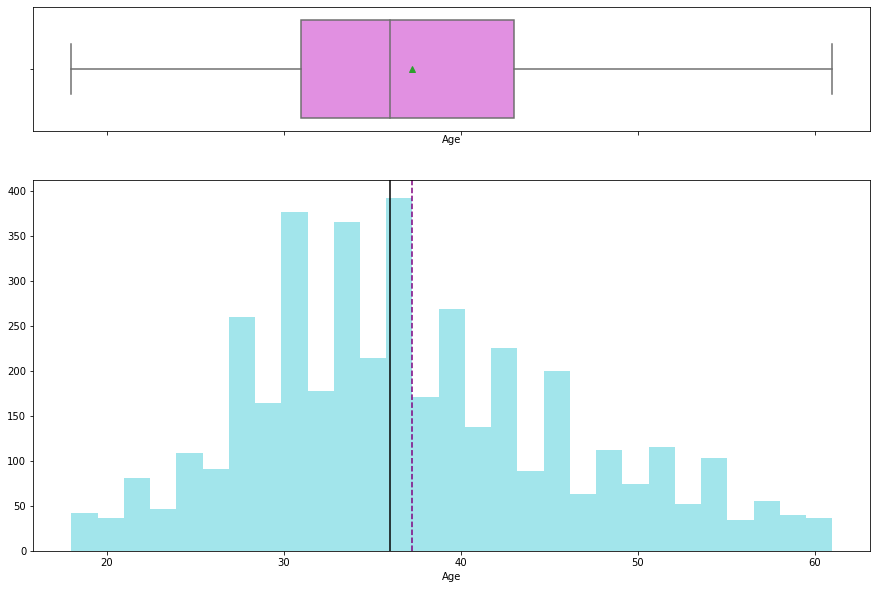

In [24]:
histogram_boxplot(data["Age"])

- Age is normaly distributed with mean and median close to each other
- There are no outliers in the data

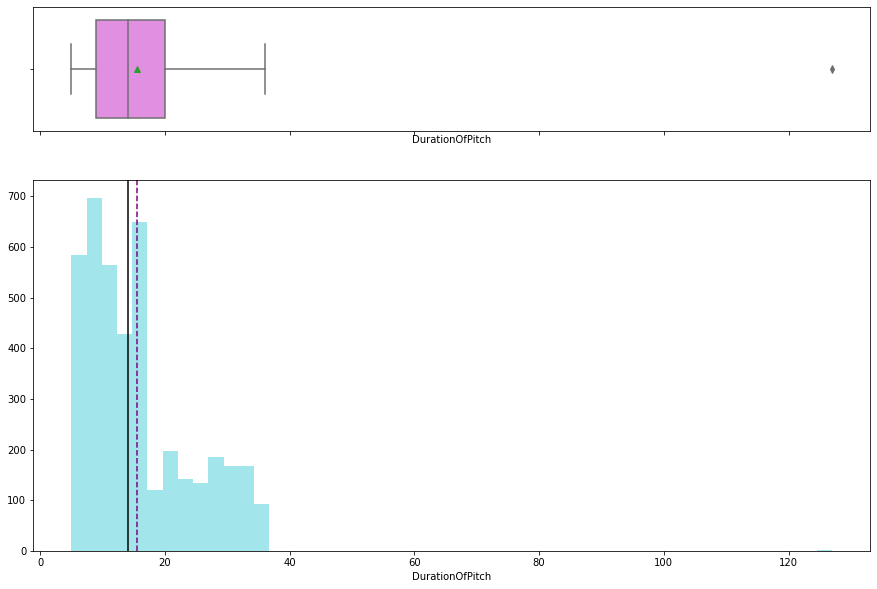

In [25]:
histogram_boxplot(data["DurationOfPitch"])

- Duration of pitch is right skewed, with isolated outliers on the right side
- Since these outliers are few and provide a very strong dispersion to the entire data, they shall be deleted

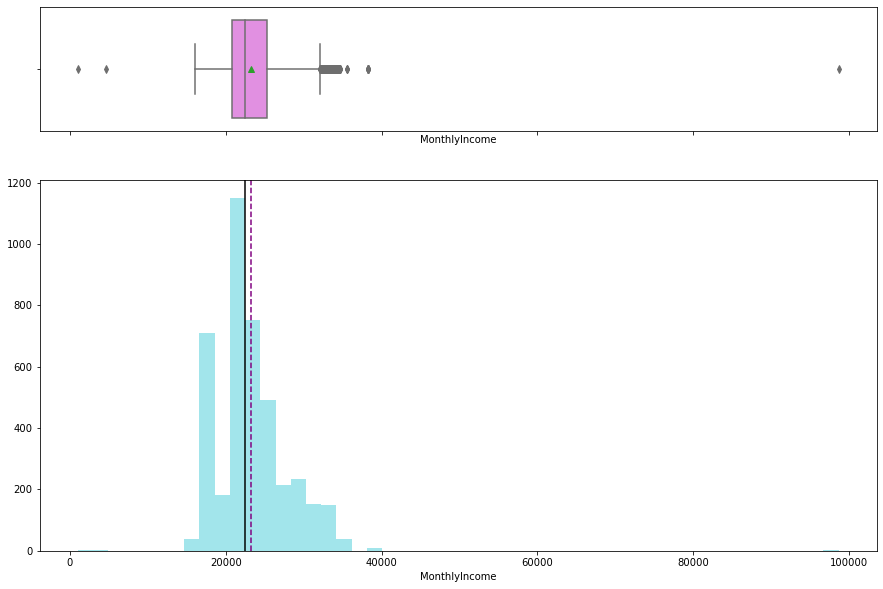

In [26]:
histogram_boxplot(data["MonthlyIncome"])

- Monthly Income is right skewed, with isolated outliers on the right and left side
- Since these outliers are few and provide a very strong dispersion to the entire data, they shall be deleted, both left and right

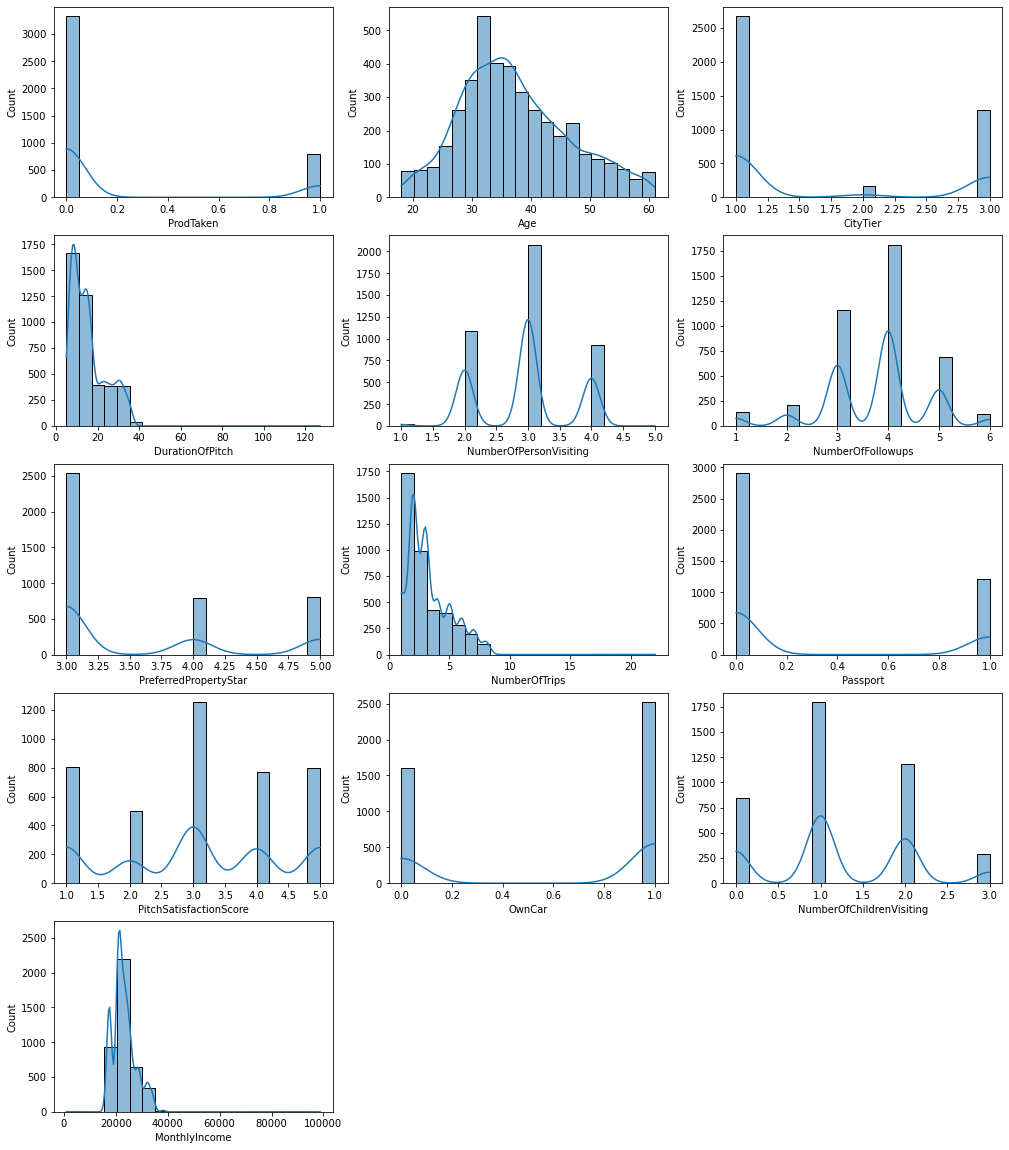

In [27]:
all_col = data.select_dtypes(include=np.number).columns.tolist()
all_col.remove("CustomerID")
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    sns.histplot(data[all_col[i]], bins = 20, kde=True)  # you can comment the previous line and run this one to get distribution curves

plt.show()


- The Graphs for categorical data provide an overview of the distribution of the categories, more insights are given below. 
- The Numerical Graphs 'Monthly Income', 'Number of Trips', 'Duration of Pitch' and 'Age' provide more insights about dispersion and outliers.
- For these numerical variables I have checked the highest value of the data and divided in Half, below you see that just few points are outside of this are, therefore highly influencing the data (except Age).

In [28]:
MI = data[data['MonthlyIncome'] > 50000] # There are only two observations with Monthly income higher than 50K, the same applies for income below 10K

In [29]:
MI.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


In [30]:
NT = data[data['NumberOfTrips'] > 10] # There are four observations higher than 10

In [31]:
NT.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,200385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,200816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,202829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,203260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


In [32]:
DP = data[data['DurationOfPitch'] > 60] # Again two observatins higher than 60 

In [33]:
DP.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3878,203878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


# EDA Analysis

In [34]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.2f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 4 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

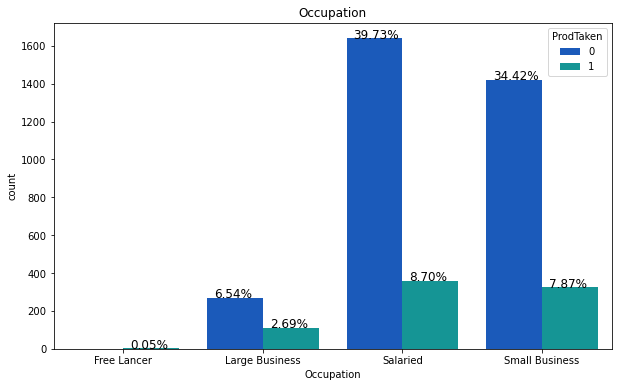

In [35]:

plt.figure(figsize=(10, 6))
plt.title('Occupation')
ax = sns.countplot(data = data, x = 'Occupation', hue = 'ProdTaken', palette="winter")
perc_on_bar(ax, data["Occupation"])

- The groups with highest proportions are Salaried and Small Business
- Though you can see that the proportion between the people who bought a package is actually comes from Large Business.

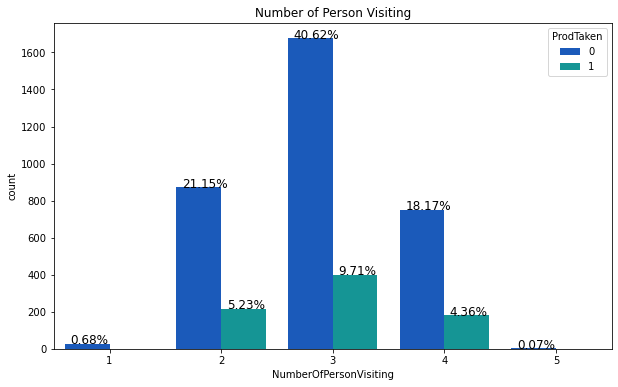

In [36]:
plt.figure(figsize=(10, 6))
plt.title('Number of Person Visiting')
ax = sns.countplot(data = data, x = 'NumberOfPersonVisiting', hue = 'ProdTaken', palette="winter")
perc_on_bar(ax, data["NumberOfPersonVisiting"])

- Almost half of the people visit in groups of 3
- Following are groups of 2 and 4 people. Bigger groups and singles are not significant
- The groups that actually purchased the packages follow the same pattern

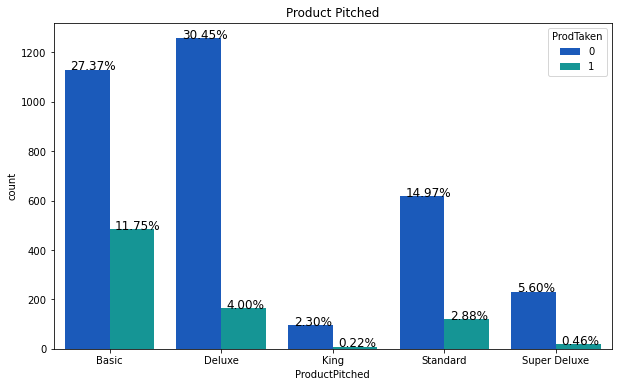

In [37]:
plt.figure(figsize=(10, 6))
plt.title('Product Pitched')
ax = sns.countplot(data = data, x = 'ProductPitched', hue = 'ProdTaken', palette="winter")
perc_on_bar(ax, data["ProductPitched"])

- The Top two products searched are Basic and Deluxe (>70%). Just a slight different between them
- All other products are not so highly represented
- Proportionally Basic packagges purchased are much higher than others, while Deluxe and Standard are quiet just slightly appart

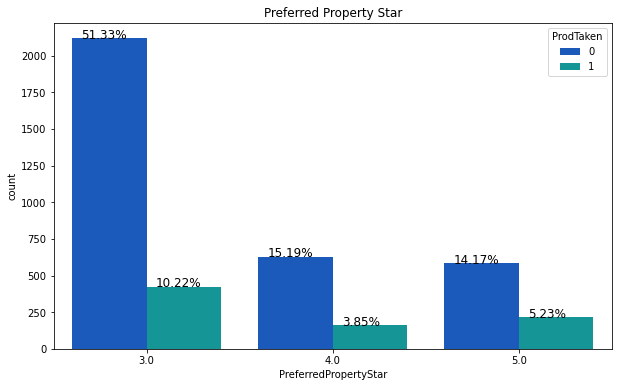

In [38]:
plt.figure(figsize=(10, 6))
plt.title('Preferred Property Star')
ax = sns.countplot(data = data, x = 'PreferredPropertyStar', hue = 'ProdTaken', palette="winter")
perc_on_bar(ax, data["PreferredPropertyStar"])

- The most searched property star is by far 3 Stars hotels.
- It is also the most booked Hotel category, but with a lower difference from  5 Stars hotel. There is less gap between booked 5 or 3 Stars, than packages searched between 5 and 3 Stars.

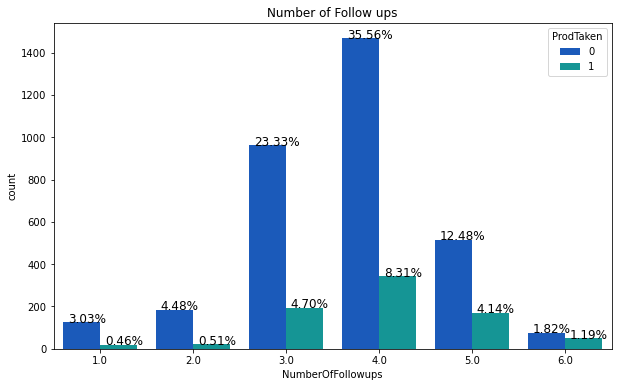

In [39]:
plt.figure(figsize=(10, 6))
plt.title('Number of Follow ups')
ax = sns.countplot(data = data, x = 'NumberOfFollowups', hue = 'ProdTaken', palette="winter")
perc_on_bar(ax, data['NumberOfFollowups'])

- The highest No. Follows ups that turned into purchase is four.
- Three and Five follow ups have almost the same proportion.
- The company strategy seems to be four Follow ups per client, since it has the highest cumulative amounts

# Data Preparation

* To make further EDA  Analysis I will delete the outliers mentioned previously. They will just create high variance in the data which may affect adversely to the trained models.


In [40]:
data.drop(data[data['DurationOfPitch'] > 60].index, inplace = True)

In [41]:
data.drop(data[data['NumberOfTrips'] > 10].index, inplace = True)

In [42]:
data.drop(data[data['MonthlyIncome'] > 50000].index, inplace = True)

In [43]:
data.drop(data[data['MonthlyIncome'] < 10000].index, inplace = True)

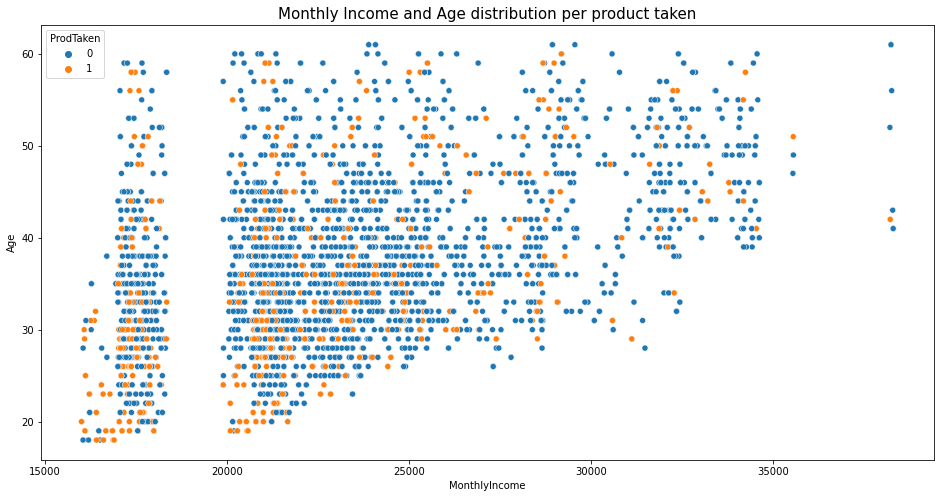

In [44]:
plt.figure(figsize=(16, 8))
plt.title('Monthly Income and Age distribution per product taken', size= 15)
sns.scatterplot(y= "Age", x="MonthlyIncome", hue = 'ProdTaken', data=data)
plt.show()

- The Graph shows that older people tend to have higher salaries. There are no individuals below 30 years old with salaries above 35K
- The majority of observations are below 50 years old and 30K Income, hence customer Base is probably between 20 and 50 years old, with income between 15K and 30K

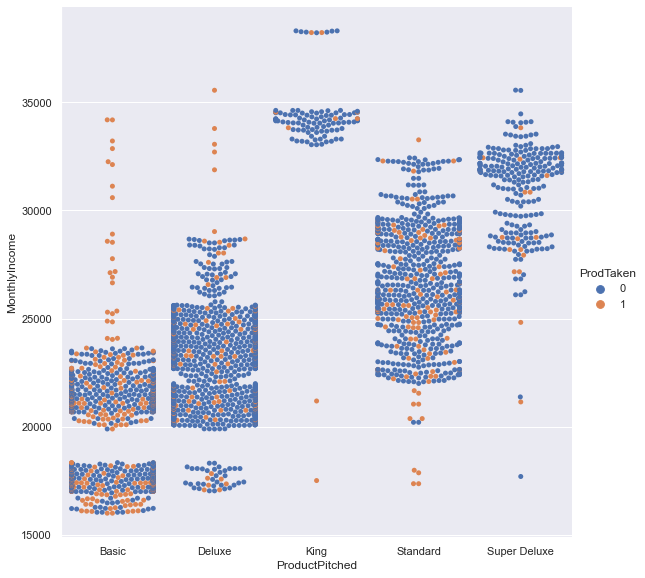

In [45]:
sns.set(rc={'figure.figsize':(25,25)})
sns.catplot(x="ProductPitched", y="MonthlyIncome", hue = 'ProdTaken', kind="swarm", data=data, height=8, aspect=1);

- Package Basic is more concentrated below 25K income. 100% of the observations above this level of income were taken.
- Deluxe Package was mostly offered/searched between 20K and 25K, and the taken products are well distributed below and above thoses incomes.
- King Package was advertised mostly for income >33K. The package was taken by customers in this income level, but two outliers well below also.
- Standard Package was advertised to a wide income range and also taken in many different levels. Though, never above 33K. 
- Super Deluxe package was mostly advertised and taken by income above 28K, but two outliers are also below this level of income.


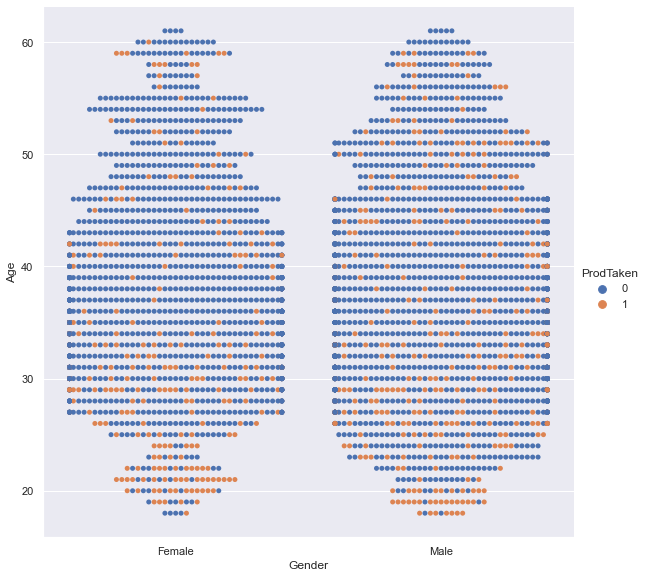

In [46]:
sns.set(rc={'figure.figsize':(25,25)})
sns.catplot(x="Gender", y="Age", hue = 'ProdTaken', kind="swarm", data=data, height=8, aspect=1);


- Gender does not seem to have influence on decision to take or not take the product
- Here we can see more clearly that the age group with more customers are between 20 and 50, to be more exact between 25 and 45.
- Below 25 people seem to have taken the packages much more often than above this age level, as we have more orange dots and less blue dots.

<AxesSubplot:>

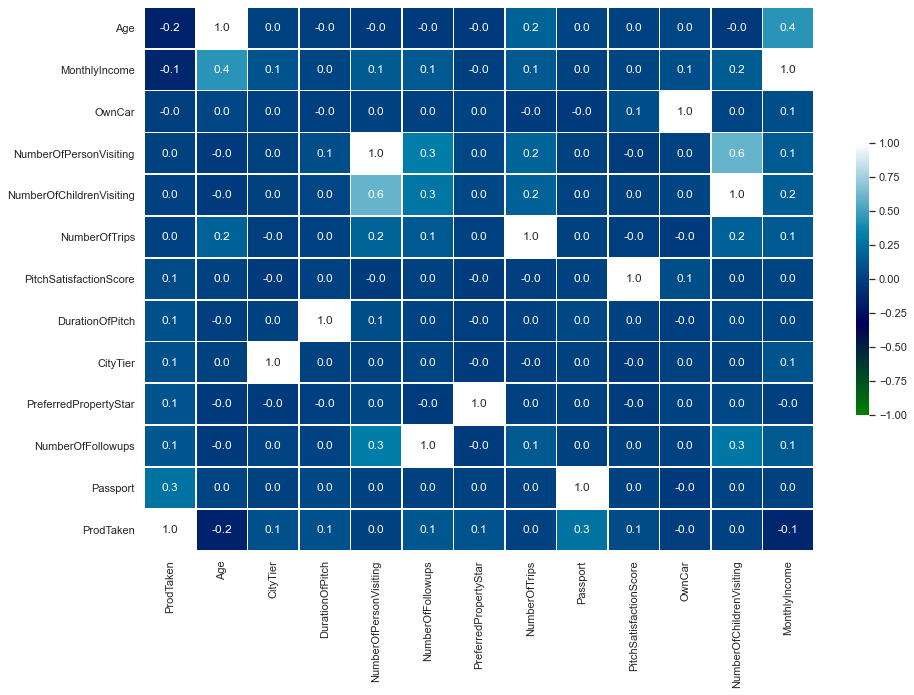

In [47]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("CustomerID")  # dropping this column since no valuable insights are given
corr = (
    data[numeric_columns].corr().sort_values(by=["ProdTaken"], ascending=True)
)  # sorting correlations w.r.t life expectancy 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="ocean",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

- The columns with highest correlations are No. person visiting and No. Children visiting
- Followed by  Monthly Income and Age
- All other variables have no significant correlation
- Since Customers ID is not a significant variable, because it is only a number given to customers, I did not consider the correlations with others.

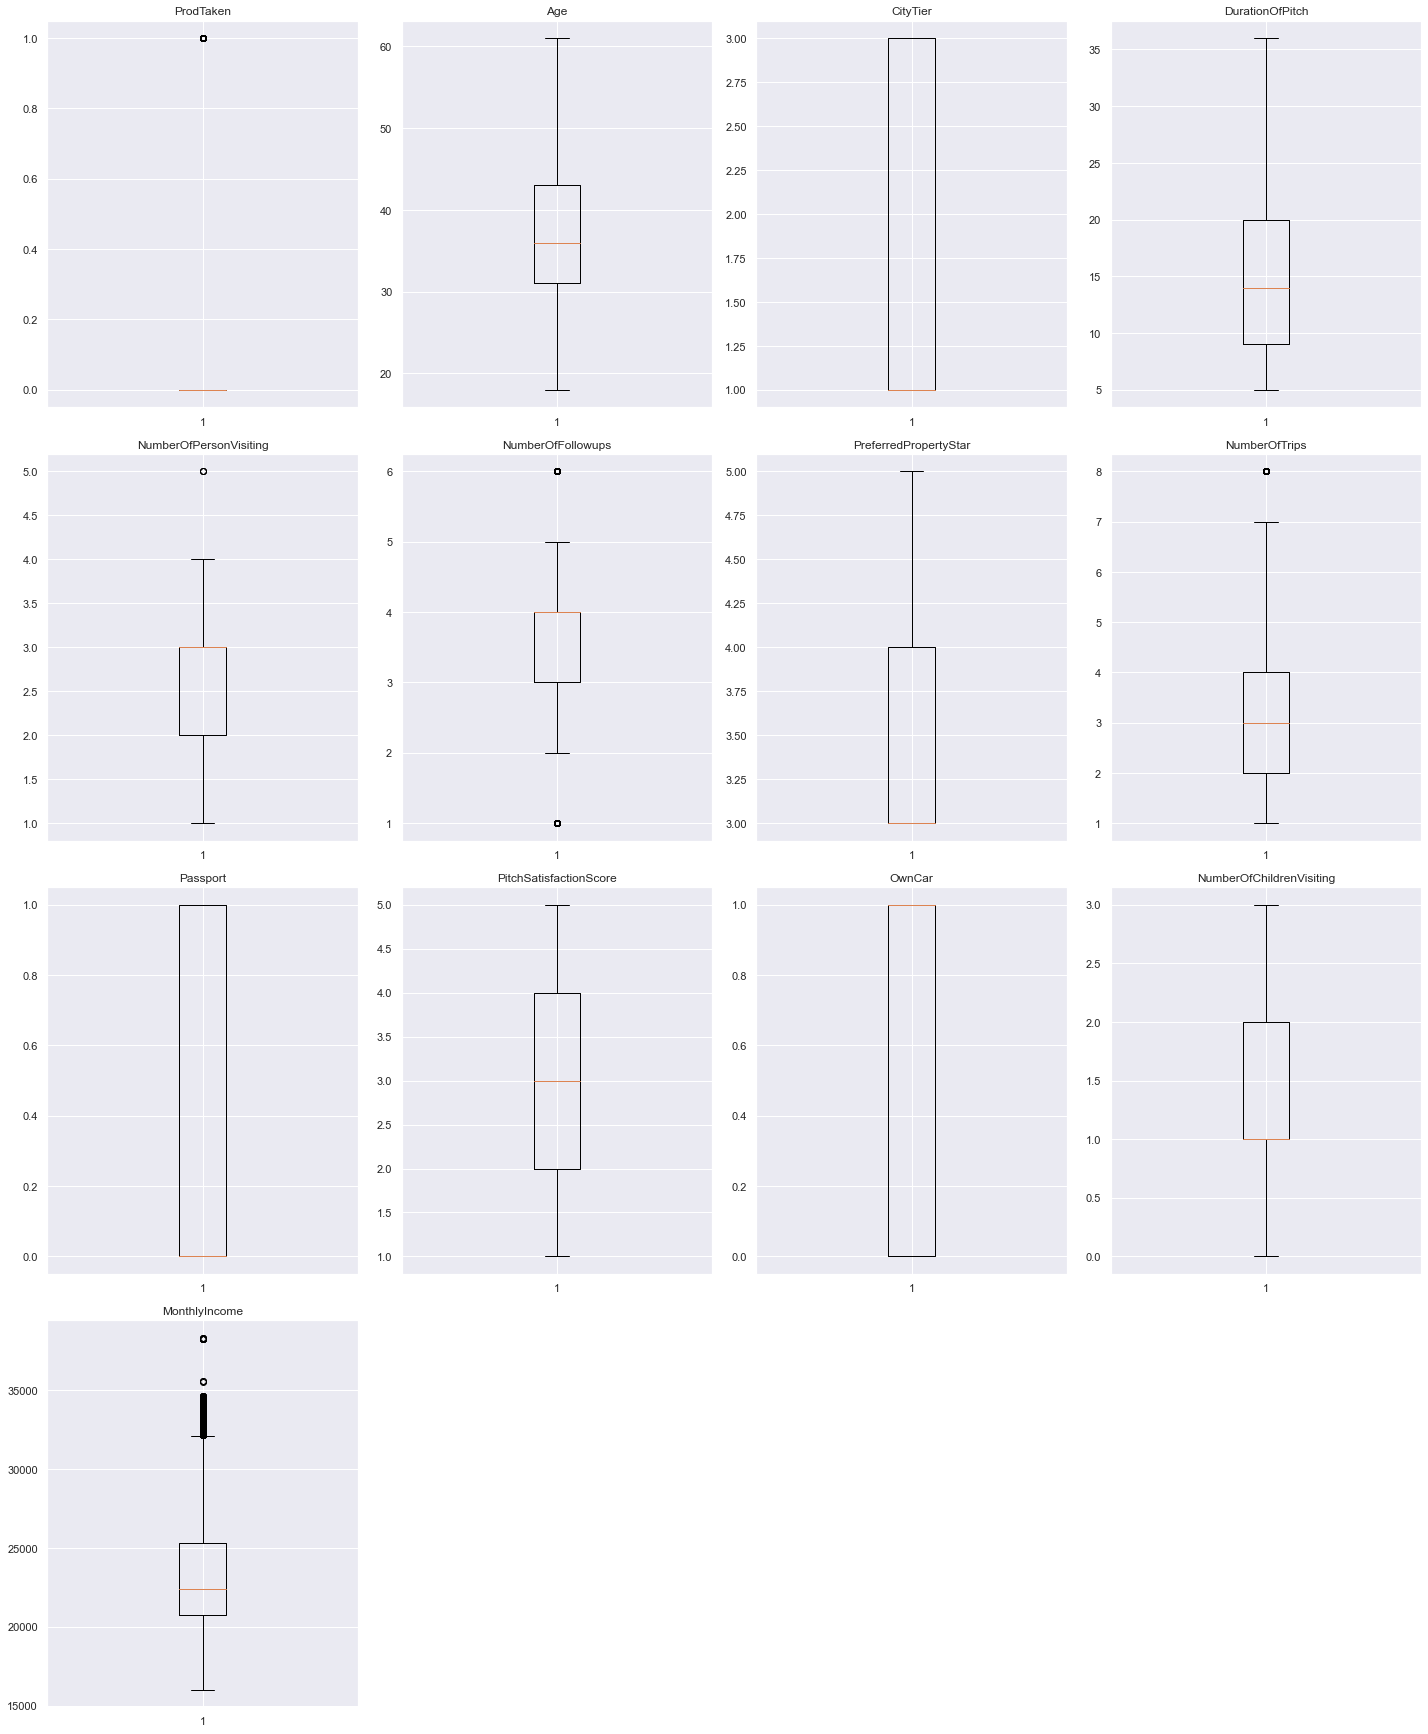

In [48]:
all_col = data.select_dtypes(include=np.number).columns.tolist()
all_col.remove("CustomerID")
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

- Despite Outliers treatment and exclusion of null value data, the final Data set still has outliers in the numerical columns.
- These outliers are important because they may represent customers looking for special packages like Honeymoon, Birthday celebrations (40/50/60) etc.
- Wellness packages are also a niche oriented market, therefore these outliers are well included.

## Summary of EDA

**Observations from EDA:**

* `ProdTaken`: This is the dependent variable and it is not equally balanced. 70% of offers were not taken.
* `Age`: It has an approximately symmetric distribution with mean and median around 36 -37 years old
* `TypeofContact`:Majority of customers came per Self Inquiry, though no information was provided weather they saw an advertisement, friends recomendation, random selection. 
* `CityTier`: Highest number of observations come from Tier 1 , followed by Tier 3, with a small amount in Tier 2
* `Occupation`: Salaried and Small Business make the customer base of the company
* `Gender`: Females are more interested on Travel, but closely followed by Males
* `NumberOfPersonVisiting`: There are very few people travelling alone or in groups bigger than 5. Group package seems not to be the focus.
* `PreferredPropertyStar`: Majority prefers three stars hotels, while four and five stars hotels are at the same level
* `MaritalStatus`: Almost half of the customers are married, while the other half divided between divorced, single or unmarried
* `NumberOfTrips`: The very extreme outliers were deleted and there is still some fair amount of outliers that represent a niche
* `Passport`: Most people do not have passport, probably mostly interested in inland Packages
* `OwnCar`: Most people do have a car, since this variable is included in data set, probably most packages were proposed without transportation (plane, train, ship)
* `NumberOfChildrenVisiting`: Most customers take one kid, followed by two kids, later no kid and fewer three kids
* `Designation`: Majority are senior position or above (Manager or Executive). This profile is reflected in occupation.
* `MonthlyIncome`: Monthly income is very spread and after outliers treatement show age is also influencing it
* `PitchSatisfactionScore`: Higher by three with the same distribution for all other levels
* `ProductPitched`: Basic and Deluxe are the most pitched packages, which has a connection with customers profile (income, age, occupation etc.)
* `NumberOfFollowups`: Four is the highest, followed by three and later two
* `DurationOfPitch`: Highly skewed, variable was treated for model

# Building Models

* Since not all variables are numerical and decision trees cannot handle non-numeric data, I will create dummy variables for the categorical features.

In [49]:
df = data.copy()

In [50]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [51]:
X = df.drop(['CustomerID','ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [52]:
y = data['ProdTaken']

In [53]:
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,0,0,1,0,0,1,0,0
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,0,0,1,0,1,0,0,0
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,0,0,0,0,0,1,0,0,0
5,32.0,1,8.0,3,3.0,3.0,1.0,0,5,1,...,0,0,0,0,1,0,1,0,0,0


In [54]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(2884, 28) (1236, 28)


In [55]:
data.ProdTaken.value_counts()

0    3325
1     795
Name: ProdTaken, dtype: int64

In [56]:
y_test.value_counts(1) # proportions are similar from original

0    0.806634
1    0.193366
Name: ProdTaken, dtype: float64

In [57]:
y.value_counts(1) # proportions are similiar from original

0    0.807039
1    0.192961
Name: ProdTaken, dtype: float64

# Metrics Importance

**The objective is to convert customer to a new Wellness Package, investing in Marketing expenditure more efficiently based on existing and potential customers.**

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package.  Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

No variables related to Wellness or Well being is available on the data set.

We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person will buy a package and in reality, that person doesn't purchase, the marketing efforts (money) will be lost. In the other hand, if we predict that a person is not going to buy but the person buys the package, our efforts are misstrusted.

In [105]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [106]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt="")
    sns.set(font_scale= 2)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Build Decision Tree Model

In [107]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.2,1:0.8}, random_state=1)

In [108]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

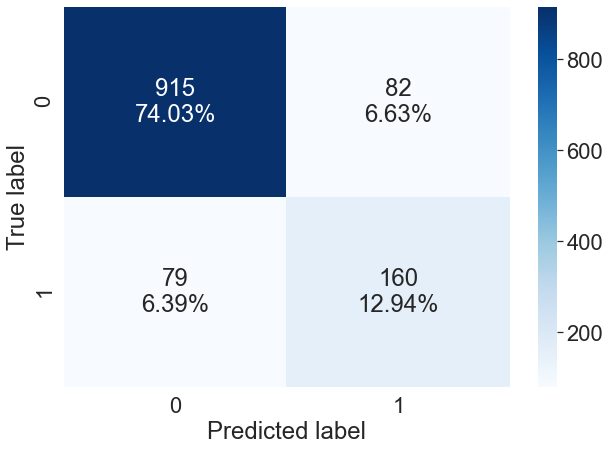

In [109]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [110]:
#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.869741  0.669456   0.661157  0.665281


- The decision tree is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
- The test recall is very low i.e. only 67%.

## Bagging Classifier

In [111]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

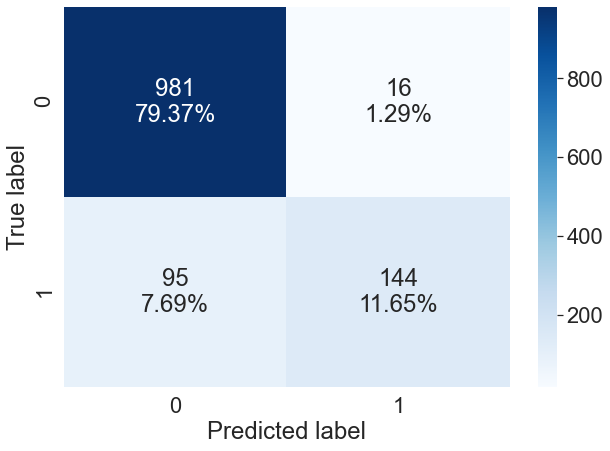

In [112]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [113]:
#Calculating different metrics
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.995839  0.978417        1.0  0.989091
Testing performance 
    Accuracy   Recall  Precision        F1
0  0.910194  0.60251        0.9  0.721805


- Bagging Classifier is also overfitting the training data as there is a considerable difference between training and test scores for Recall and F1.
- The test recall is even lower than the decision tree but the other three scores are higher.

# Bagging Classifier Weighted

In [114]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.2,1:0.8},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  random_state=1)

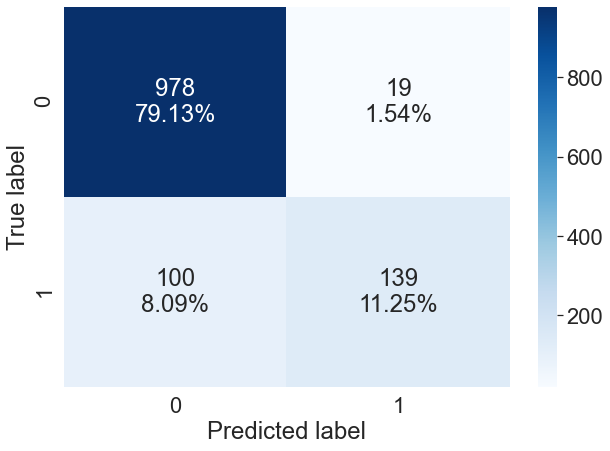

In [115]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [116]:
#Calculating different metrics
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994452  0.971223        1.0  0.985401
Testing performance 
    Accuracy   Recall  Precision        F1
0  0.903722  0.58159   0.879747  0.700252


- The weighted Bagging Classifier did not provide much change in Metrics, only a slight decrease in Recall

## Random Forrest

In [117]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

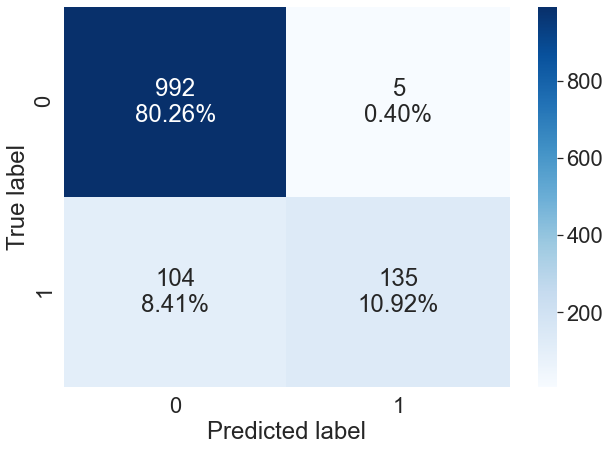

In [118]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [119]:
#Calculating different metrics
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.911812  0.564854   0.964286  0.712401


- Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
- The test recall is still very low. 

# Random Forrest Weighted

In [120]:
rf_wt = RandomForestClassifier(class_weight={0:0.2,1:0.8}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

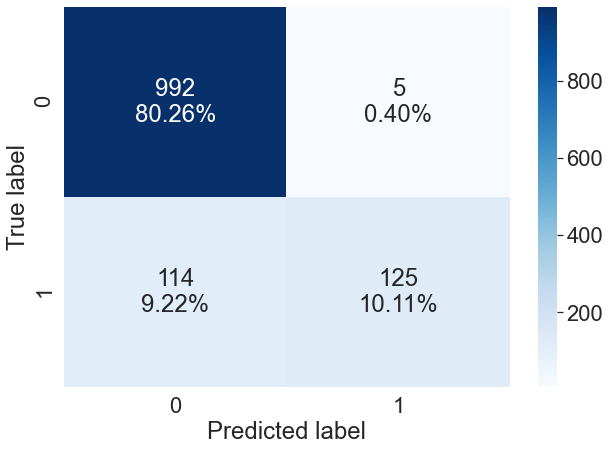

In [121]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [122]:
#Calculating different metrics
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.903722  0.523013   0.961538  0.677507


- The same applies to the Random Forrest weighted version, Training is overfitting, while Test sets score for Recall is still very low.

## AdaBoostClassifier

In [123]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [135]:
#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(abc,X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(abc,X_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.840846  0.341727   0.671378  0.45292
Test performance:
    Accuracy    Recall  Precision        F1
0  0.851942  0.372385   0.729508  0.493075


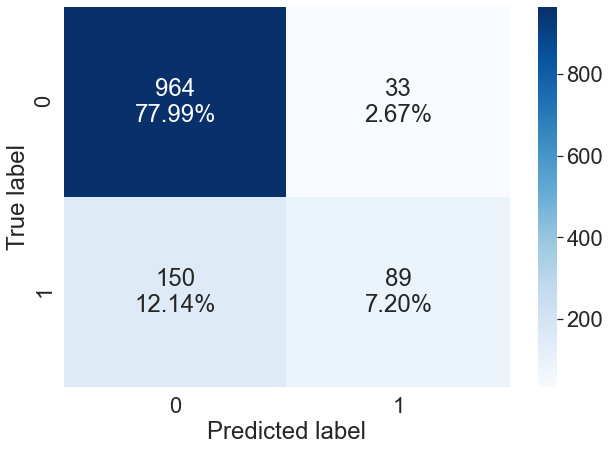

In [126]:
confusion_matrix_sklearn(abc,X_test,y_test)

- AdaBoosting is not overfitting the Training Model and the Metrics for Training and Test sets are close to each other
- Though, Recall is very low both in Training and Test, therefore it will perform poorly in the predictions

## Gradient Boosting Classifier 

In [127]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [128]:
#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gbc,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gbc,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.894591  0.516187   0.891304  0.653759
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.874595  0.443515   0.828125  0.577657


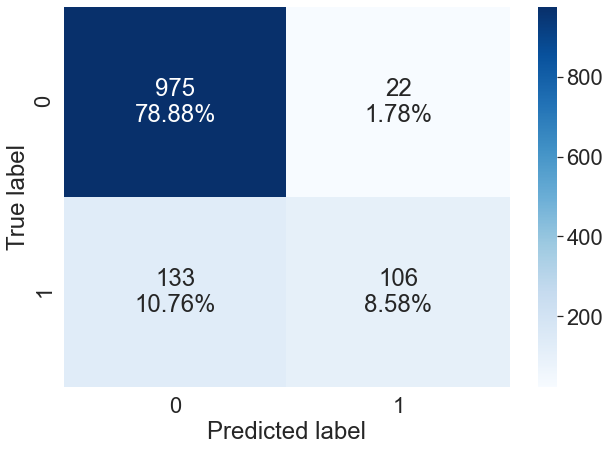

In [129]:
confusion_matrix_sklearn(gbc,X_test,y_test)

- Gradient Boost Classifier is similar to AdaBoosting, is not overfitting the Training Model and the Metrics for Training and Test sets are close to each other.
- Though, Recall is very low both in Training and Test, therefore it will perform poorly in the predictions

## XGBoost Classifier

In [130]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[10:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)


Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.923139  0.669456   0.909091  0.771084


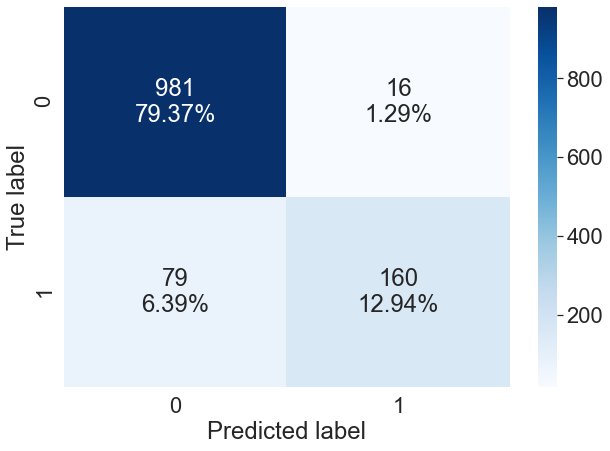

In [132]:
confusion_matrix_sklearn(xgb,X_test,y_test)

- XGBoost Classifier is overfitting the Training model.
- Metrics for Test Model are better than any other model presented previously.

# Hyperparameter Tuning
## AdaBoost Classifier

In [133]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5000000000000002, n_estimators=80,
                   random_state=1)

In [147]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.992025  0.973022   0.985428  0.979186
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.87945  0.619247   0.718447  0.665169


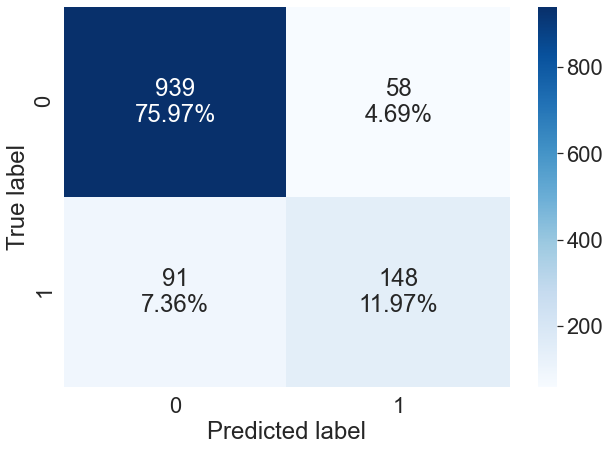

In [136]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

- AdaBoost Classifier with Hyperparameter is still overfitting Training model
- Test Data is closer to training data, but Recall, F1 scores were better before (Decision Tree & Bagging classifier )

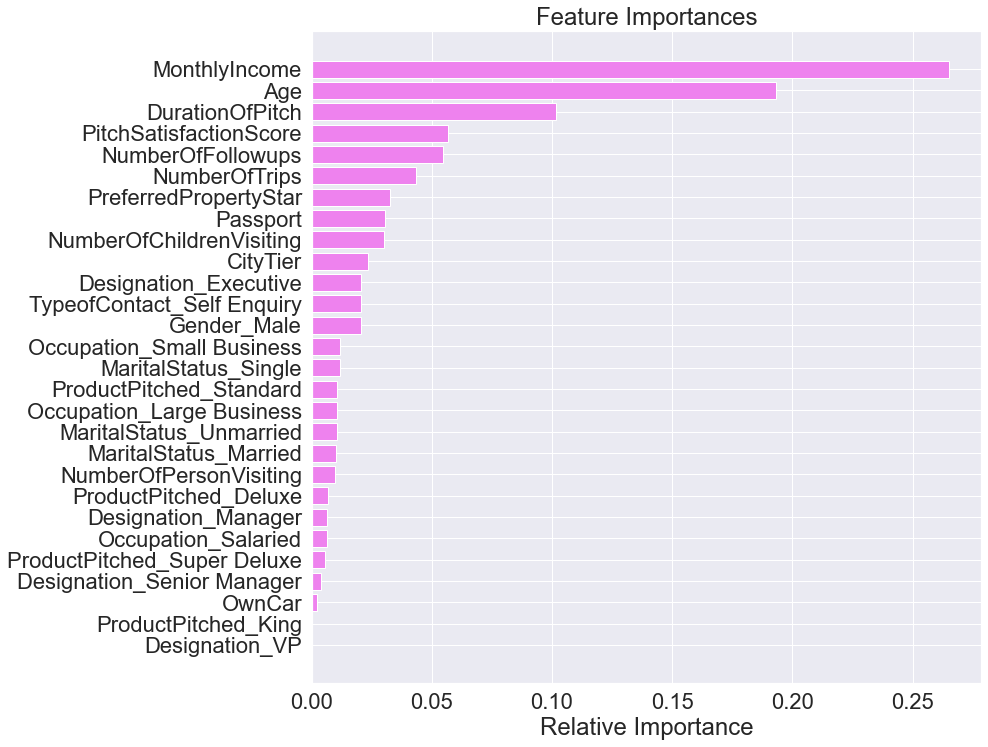

In [137]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The most important variables are Monthly Income, Age and Duration of Pitch. None is overproportionally more important than the other. 
- Seems a good balance between all variables and the relationship with package acceptance.

## Gradient Boosting Classifier

In [138]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [152]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.935506  0.690647   0.964824  0.805031
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.894822  0.548117   0.856209  0.668367


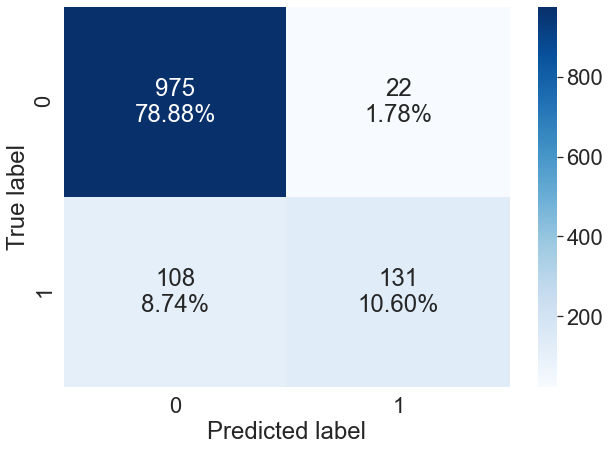

In [140]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

- Gradient Boosting Classifier with Hyperparameter has the same characteristics as  Adaboosting Classifier, training set overfitting, while test is improved, but not yet the best fit.
- Recall Metrics very low.

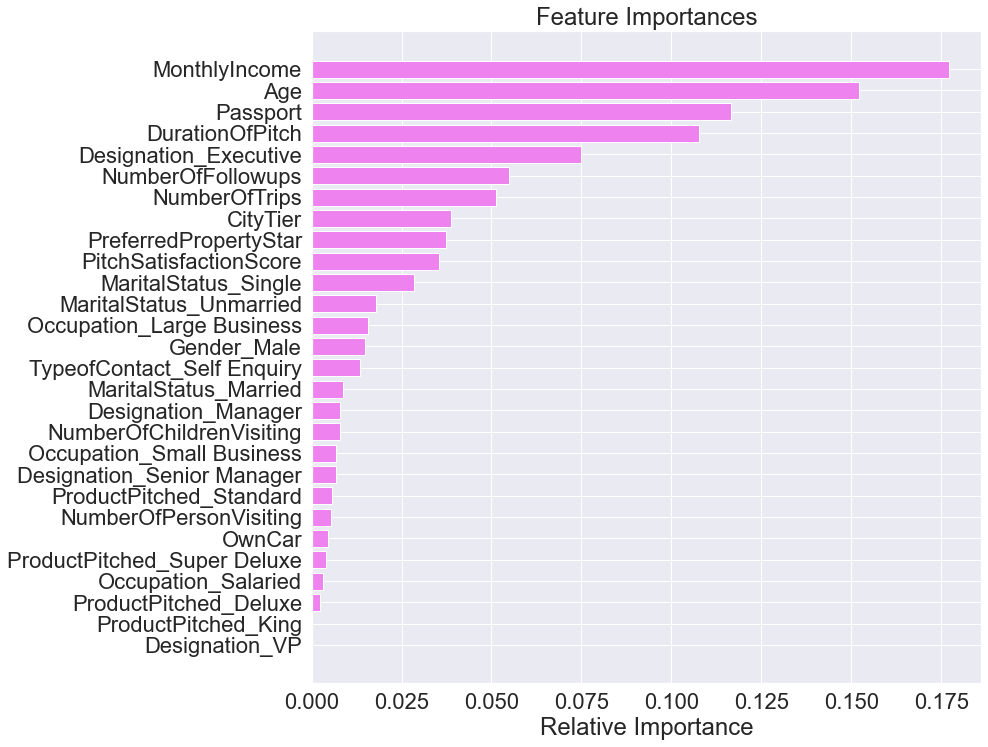

In [141]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Gradient Boosting Classifier variables have changed a bit, the importance of the top three decreased and Passport came from 8th place to 3rd place
- Monhtly Income decreased its importance from 26% to 18%.
- Age decreased from 19% to 15%.

## XGBoost Classifier

In [142]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [151]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.988558  0.996403   0.947009  0.971078
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.919094  0.820084   0.774704  0.796748


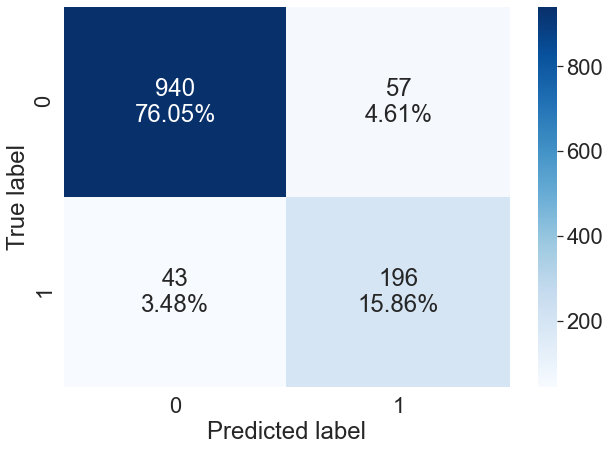

In [145]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

- XGBoost Classifier with Hyperparameter is overfitting the training data, but has a good improvement on the test data.
- Recall has its best metrics compared to other models, while other metrics are also increased performance and are closer to training metrics.

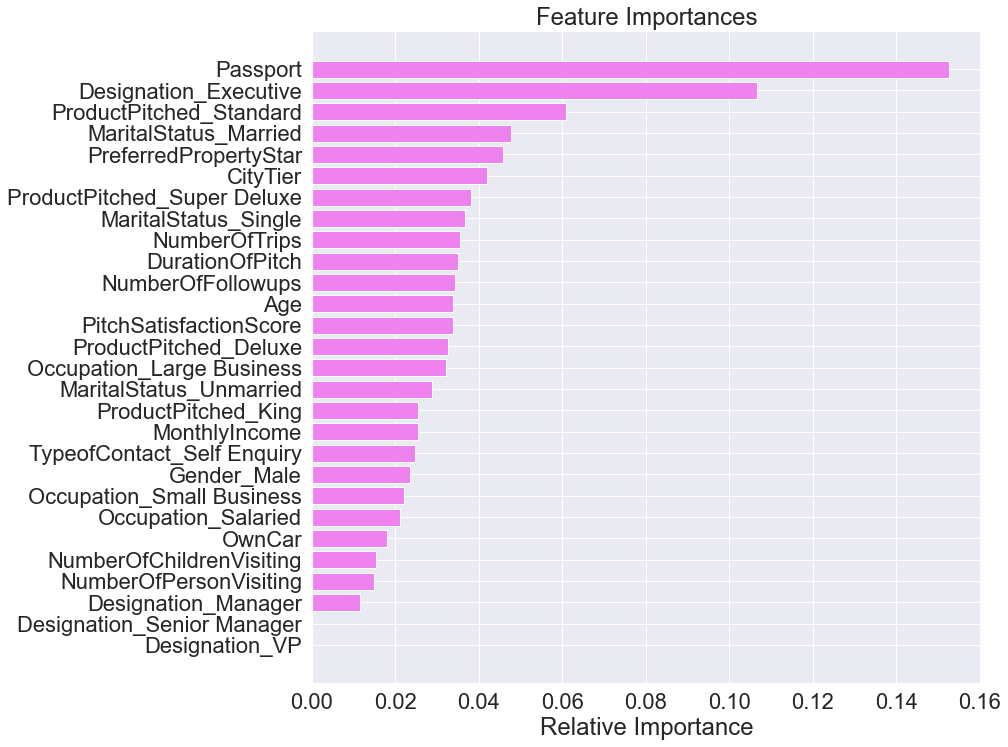

In [146]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Many changes happened in the variables importance depending on the model. Monthly Income went way down in importance, while passport turned out to be the top one in decision making.
- Variables like Age and Duration of Pitch are below the top 9 most important variables. Duration of pitch is 10th place.

# Comparing all Models

In [153]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,ab_classifier_model_train_perf.T, abc_tuned_model_train_perf.T,
     gb_classifier_model_train_perf.T, gbc_tuned_model_train_perf.T, xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "AdaBoost Classifier",
    "Hyperparameter AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "Hyperparameter Gradient Boosting Classifier",
    "XGBoost Classifier",
    "Hyperparameter XGBoost Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,AdaBoost Classifier,Hyperparameter AdaBoost Classifier,Gradient Boosting Classifier,Hyperparameter Gradient Boosting Classifier,XGBoost Classifier,Hyperparameter XGBoost Classifier
Accuracy,1.0,0.995839,0.994452,1.0,1.0,0.840846,0.992025,0.894591,0.935506,1.0,0.988558
Recall,1.0,0.978417,0.971223,1.0,1.0,0.341727,0.973022,0.516187,0.690647,1.0,0.996403
Precision,1.0,1.000000,1.000000,1.0,1.0,0.671378,0.985428,0.891304,0.964824,1.0,0.947009
F1,1.0,0.989091,0.985401,1.0,1.0,0.452920,0.979186,0.653759,0.805031,1.0,0.971078


In [154]:
# test performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,ab_classifier_model_test_perf.T, abc_tuned_model_test_perf.T,
     gb_classifier_model_test_perf.T, gbc_tuned_model_test_perf.T, xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "AdaBoost Classifier",
    "Hyperparameter AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "Hyperparameter Gradient Boosting Classifier",
    "XGBoost Classifier",
    "Hyperparameter XGBoost Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,AdaBoost Classifier,Hyperparameter AdaBoost Classifier,Gradient Boosting Classifier,Hyperparameter Gradient Boosting Classifier,XGBoost Classifier,Hyperparameter XGBoost Classifier
Accuracy,0.869741,0.910194,0.903722,0.911812,0.903722,0.851942,0.879450,0.874595,0.894822,0.923139,0.919094
Recall,0.669456,0.602510,0.581590,0.564854,0.523013,0.372385,0.619247,0.443515,0.548117,0.669456,0.820084
Precision,0.661157,0.900000,0.879747,0.964286,0.961538,0.729508,0.718447,0.828125,0.856209,0.909091,0.774704
F1,0.665281,0.721805,0.700252,0.712401,0.677507,0.493075,0.665169,0.577657,0.668367,0.771084,0.796748


# Business Insights and Recommendations

- The model selected for predictions is the Hyperparameter XGBoost Classifier:

It has the best score for Recall in the test data. Other Metrics in the Test data are also high and close to the training data metrics.
Despite overfitting training data, most of the models showed a high tendency to overfit the training data, despite weight treatment and hyperparameters adjustments.

The model also showed a very different priority level to the variables compared to other models. Though these variables are not highly concentrated in a single one, but well distributed between the top five. 

Some considerations need to be risen regarding lack of data on wellness and well being data. If the company wants to sell a new product type, it would be recommendable to consider additional research among customers about their willingness to book wellness packages. 
